In [1]:
import tensorflow as tf

In [2]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[4, 3], [2, 1]])
c = a*b
print(c)

tf.Tensor(
[[4 6]
 [6 4]], shape=(2, 2), dtype=int32)


In [3]:
def matrix_mul1():
    a = tf.random.normal([10000, 10000], 0, 1)
    b = tf.random.normal([10000, 10000], 0, 1)
    return tf.reduce_sum(tf.matmul(a, b))

print(matrix_mul1())

tf.Tensor(443664.56, shape=(), dtype=float32)


In [4]:
@tf.function
def matrix_mul2():
    a = tf.random.normal([10000, 10000], 0, 1)
    b = tf.random.normal([10000, 10000], 0, 1)
    return tf.reduce_sum(tf.matmul(a, b))

print(matrix_mul2())

tf.Tensor(-504107.12, shape=(), dtype=float32)


In [5]:
import numpy as np

def matrix_mulnp():
    a = np.random.normal(0, 1, [10000, 10000])
    b = np.random.normal(0, 1, [10000, 10000])
    return np.sum(np.matmul(a, b))

print(matrix_mulnp())

840446.182683397


In [6]:
import time

start = time.time()
print(matrix_mulnp())
end = time.time()
print(f'np time is {end-start}')

start = time.time()
print(matrix_mul1())
end = time.time()
print(f'mul1 time is {end-start}')

start = time.time()
print(matrix_mul2())
end = time.time()
print(f'mul2 time is {end-start}')

675418.9600459544
np time is 20.063035488128662
tf.Tensor(585193.4, shape=(), dtype=float32)
mul1 time is 0.7039973735809326
tf.Tensor(-555350.6, shape=(), dtype=float32)
mul2 time is 0.6709678173065186


In [7]:
# Едно предимство на употребата на изчислителните графи е utilization of hardware

In [8]:
x = tf.Variable([1, 2, 3])
x = x*x
print(x)

tf.Tensor([1 4 9], shape=(3,), dtype=int32)


In [9]:
# Можем да изчисляваме и производни!

w = tf.Variable(5.0);
@tf.function
def f(x):
    x = w*x
    x = x+5
    x = x*x
    return x

with tf.GradientTape() as tape:
    a = f(2)

print(tape.gradient(a, w))

tf.Tensor(60.0, shape=(), dtype=float32)


In [10]:
# Но можем и за произволни тензори по същия начин
# Btw, има разлика между variable и node, т.е. assign е различно от =

w = tf.Variable(tf.random.normal([32, 2], 0, 0.5))
b = tf.Variable(tf.random.normal([2], 0, 0.5))

@tf.function
def forward_pass(inp):
    inp = tf.matmul(inp, w)+b
    inp = tf.nn.relu(inp)
    return inp;

x = tf.constant(tf.random.normal([1000, 32], 0, 1))
y = tf.constant(tf.random.normal([1000, 2], 0, 1))
lr = 0.05
for i in range(10):
    with tf.GradientTape() as tape:
        output = forward_pass(x)
        loss = tf.reduce_mean((y-output)**2)
    print(loss)
    gw, gb = tape.gradient(loss, [w, b])
    w.assign_sub(lr*gw)
    b.assign_sub(lr*gb)

tf.Tensor(6.053625, shape=(), dtype=float32)
tf.Tensor(5.6013966, shape=(), dtype=float32)
tf.Tensor(5.193929, shape=(), dtype=float32)
tf.Tensor(4.826839, shape=(), dtype=float32)
tf.Tensor(4.4949226, shape=(), dtype=float32)
tf.Tensor(4.1946177, shape=(), dtype=float32)
tf.Tensor(3.9232795, shape=(), dtype=float32)
tf.Tensor(3.6777883, shape=(), dtype=float32)
tf.Tensor(3.4559035, shape=(), dtype=float32)
tf.Tensor(3.2543287, shape=(), dtype=float32)


In [11]:
# Да научим ксор :Д (тук съквах много време на няква глупост)

w1 = tf.Variable(tf.random.normal([2, 2], 0, 0.5))
b1 = tf.Variable(tf.random.normal([2], 0, 0.5))
w2 = tf.Variable(tf.random.normal([2, 1], 0, 0.5))
b2 = tf.Variable(tf.random.normal([1], 0, 0.5))

@tf.function
def forward_pass(x):
    x = tf.matmul(x, w1) + b1
    x = tf.nn.sigmoid(x)
    x = tf.matmul(x, w2) + b2
    x = tf.nn.sigmoid(x)
    return x

lr = 2
x = tf.constant([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=tf.float32)
y = tf.constant([[0], [1], [1], [0]], dtype=tf.float32);
for i in range(1000):
    with tf.GradientTape() as tape:
        output = forward_pass(x)
        loss = tf.reduce_mean((y-output)**2)
    if (i%50==0): print(loss)
    grads = tape.gradient(loss, [w1, b1, w2, b2])
    w1.assign_sub(lr*grads[0])
    b1.assign_sub(lr*grads[1])
    w2.assign_sub(lr*grads[2])
    b2.assign_sub(lr*grads[3])
    
print(w1, b1, w2, b2)

tf.Tensor(0.3382317, shape=(), dtype=float32)
tf.Tensor(0.25004464, shape=(), dtype=float32)
tf.Tensor(0.25001812, shape=(), dtype=float32)
tf.Tensor(0.25000116, shape=(), dtype=float32)
tf.Tensor(0.24998823, shape=(), dtype=float32)
tf.Tensor(0.24997635, shape=(), dtype=float32)
tf.Tensor(0.24996349, shape=(), dtype=float32)
tf.Tensor(0.24994755, shape=(), dtype=float32)
tf.Tensor(0.24992576, shape=(), dtype=float32)
tf.Tensor(0.24989395, shape=(), dtype=float32)
tf.Tensor(0.24984433, shape=(), dtype=float32)
tf.Tensor(0.24976152, shape=(), dtype=float32)
tf.Tensor(0.24961217, shape=(), dtype=float32)
tf.Tensor(0.24931538, shape=(), dtype=float32)
tf.Tensor(0.24864994, shape=(), dtype=float32)
tf.Tensor(0.24693933, shape=(), dtype=float32)
tf.Tensor(0.24208903, shape=(), dtype=float32)
tf.Tensor(0.22976285, shape=(), dtype=float32)
tf.Tensor(0.21057993, shape=(), dtype=float32)
tf.Tensor(0.19123788, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=


In [12]:
forward_pass(x)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.37261495],
       [0.44831434],
       [0.7913399 ],
       [0.35443377]], dtype=float32)>

In [13]:
# Да ползваме друг loss (binary crossentropy е за предпочитане при активация сигмоид за класификация)

w1 = tf.Variable(tf.random.normal([2, 2], 0, 0.5))
b1 = tf.Variable(tf.random.normal([2], 0, 0.5))
w2 = tf.Variable(tf.random.normal([2, 1], 0, 0.5))
b2 = tf.Variable(tf.random.normal([1], 0, 0.5))

@tf.function
def forward_pass(x):
    x = tf.matmul(x, w1) + b1
    x = tf.nn.sigmoid(x)
    x = tf.matmul(x, w2) + b2
    x = tf.nn.sigmoid(x)
    return x

lr = 2
x = tf.constant([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=tf.float32)
y = tf.constant([[0], [1], [1], [0]], dtype=tf.float32);
for i in range(1000):
    with tf.GradientTape() as tape:
        output = forward_pass(x)
        loss = -tf.reduce_mean(y*tf.math.log(output) + (1-y)*tf.math.log(1-output))
    if (i%50==0): print(loss)
    grads = tape.gradient(loss, [w1, b1, w2, b2])
    w1.assign_sub(lr*grads[0])
    b1.assign_sub(lr*grads[1])
    w2.assign_sub(lr*grads[2])
    b2.assign_sub(lr*grads[3])
    
print(w1, b1, w2, b2)

tf.Tensor(0.848969, shape=(), dtype=float32)
tf.Tensor(0.6931493, shape=(), dtype=float32)
tf.Tensor(0.6931418, shape=(), dtype=float32)
tf.Tensor(0.6931282, shape=(), dtype=float32)
tf.Tensor(0.6930964, shape=(), dtype=float32)
tf.Tensor(0.69299835, shape=(), dtype=float32)
tf.Tensor(0.69251716, shape=(), dtype=float32)
tf.Tensor(0.6867921, shape=(), dtype=float32)
tf.Tensor(0.6219328, shape=(), dtype=float32)
tf.Tensor(0.51449335, shape=(), dtype=float32)
tf.Tensor(0.3431622, shape=(), dtype=float32)
tf.Tensor(0.12774658, shape=(), dtype=float32)
tf.Tensor(0.06322521, shape=(), dtype=float32)
tf.Tensor(0.040282205, shape=(), dtype=float32)
tf.Tensor(0.029168624, shape=(), dtype=float32)
tf.Tensor(0.022727996, shape=(), dtype=float32)
tf.Tensor(0.018558964, shape=(), dtype=float32)
tf.Tensor(0.015652765, shape=(), dtype=float32)
tf.Tensor(0.013516802, shape=(), dtype=float32)
tf.Tensor(0.011883625, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
a

In [14]:
forward_pass(x)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00847107],
       [0.9905131 ],
       [0.99051195],
       [0.01470207]], dtype=float32)>

In [15]:
# Да преминем към работа с реален dataset (този от домашното ви - notMNIST)

import matplotlib.pyplot as plt
import os
from six.moves.urllib.request import urlretrieve
import tarfile

url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      print(f"{percent}%")
    else:
      print(".")
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified .\notMNIST_large.tar.gz
Found and verified .\notMNIST_small.tar.gz


In [16]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

.\notMNIST_large already present - Skipping extraction of .\notMNIST_large.tar.gz.
['.\\notMNIST_large\\A', '.\\notMNIST_large\\B', '.\\notMNIST_large\\C', '.\\notMNIST_large\\D', '.\\notMNIST_large\\E', '.\\notMNIST_large\\F', '.\\notMNIST_large\\G', '.\\notMNIST_large\\H', '.\\notMNIST_large\\I', '.\\notMNIST_large\\J']
.\notMNIST_small already present - Skipping extraction of .\notMNIST_small.tar.gz.
['.\\notMNIST_small\\A', '.\\notMNIST_small\\B', '.\\notMNIST_small\\C', '.\\notMNIST_small\\D', '.\\notMNIST_small\\E', '.\\notMNIST_small\\F', '.\\notMNIST_small\\G', '.\\notMNIST_small\\H', '.\\notMNIST_small\\I', '.\\notMNIST_small\\J']


In [17]:
train_dir = [os.fsencode(x) for x in train_folders]
test_dir = [os.fsencode(x) for x in test_folders]

.\notMNIST_small\A\MDEtMDEtMDAudHRm.png
(28, 28)


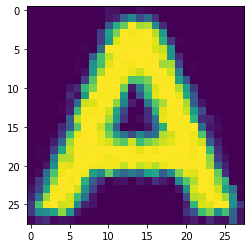

In [18]:
import cv2

file_name = os.listdir(test_dir[0])[0]
file = os.path.join(test_dir[0], file_name).decode("utf-8")
print(file)
im = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
print(im.shape)
plt.imshow(im)

In [19]:
x_train, y_train = [], []
x_test, y_test = [], []
# for i in range(10):
#     print(i, end='\r')
#     for file_name in os.listdir(train_dir[i]):
#         file = os.path.join(train_dir[i], file_name).decode("utf-8")
#         x_train.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))
#         y_train.append(i)
#         if x_train[-1] is None:
#             x_train.pop()
#             y_train.pop()
#     for file_name in os.listdir(test_dir[i]):
#         file = os.path.join(test_dir[i], file_name).decode("utf-8")
#         x_test.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))
#         y_test.append(i)
#         if x_test[-1] is None:
#             x_test.pop()
#             y_test.pop()

# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# x_test = np.asarray(x_test)
# y_test = np.asarray(y_test)
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [20]:
import pickle
# with open("data.pickle", "wb") as file:
#     pickle.dump([x_train, y_train, x_test, y_test], file)

In [21]:
with open("data.pickle", "rb") as file:
    x_train, y_train, x_test, y_test = pickle.load(file)
    
x_train = (x_train/255.0).astype(np.float32)
x_test = (x_test/255.0).astype(np.float32)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(529114, 28, 28) (529114,)
(18724, 28, 28) (18724,)


In [22]:
# Да си дефинираме 2-слойна невронна мрежа

w = [tf.Variable(tf.random.normal([28*28, 32])), tf.Variable(tf.random.normal([32, 10]))]
b = [tf.Variable(tf.random.normal([32])), tf.Variable(tf.random.normal([10]))]

@tf.function
def forward_pass(x):
    for i in range(len(w)):
        x = tf.matmul(x, w[i]) + b[i]
        if i != len(w)-1:
            x = tf.nn.relu(x)
    return x

In [23]:
import random

batch_size = 256
epochs = 10
lr = 1e-2
train_losses = []
test_losses = []

ind = [i for i in range(len(y_train))]

for i in range(epochs):
    random.shuffle(ind)
    for j in range(len(y_train)//batch_size):
        batch_x = np.array(x_train[ind[j*batch_size : (j+1)*batch_size]]).reshape([batch_size, 28*28])
        batch_y = np.array(y_train[ind[j*batch_size : (j+1)*batch_size]])
        batch_y = np.eye(10)[batch_y]
        with tf.GradientTape() as tape:
            output = forward_pass(batch_x)
            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=batch_y, logits=output))
        train_losses.append(loss)
        acc = np.mean(np.argmax(output, axis=-1) == np.argmax(batch_y, axis=-1))*100
        print(f"Epoch {i}, batch {j}/{len(y_train)//batch_size} loss = {loss}, acc = {acc}", end='\r')
        g = tape.gradient(loss, [w[0], w[1], b[0], b[1]])
        w[0].assign_sub(lr*g[0])
        w[1].assign_sub(lr*g[1])
        b[0].assign_sub(lr*g[2])
        b[1].assign_sub(lr*g[3])
    output = forward_pass(x_test.reshape([-1, 28*28]))
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=np.eye(10)[y_test], logits=output))
    test_losses.append(loss)
    acc = np.mean(np.argmax(output, axis=-1) == y_test)*100
    print(f"Epoch {i}, test_loss = {loss}, test_acc = {acc}")

Epoch 0, test_loss = 1.3847275972366333, test_acc = 64.17966246528519
Epoch 1, test_loss = 1.1077920198440552, test_acc = 69.38688314462722
Epoch 2, test_loss = 0.9806108474731445, test_acc = 72.38837855159154
Epoch 3, test_loss = 0.8954808712005615, test_acc = 74.85045930356762
Epoch 4, test_loss = 0.8364266157150269, test_acc = 76.67165135654774
Epoch 5, test_loss = 0.79938143491745, test_acc = 77.73445844904934
Epoch 6, test_loss = 0.7591086030006409, test_acc = 79.13373210852383
Epoch 7, test_loss = 0.7329556941986084, test_acc = 80.03097628711814
Epoch 8, test_loss = 0.7038742899894714, test_acc = 80.69856868190558
Epoch 9, test_loss = 0.6818004250526428, test_acc = 81.5637684255501


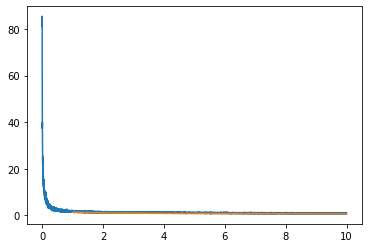

In [24]:
plt.plot(np.arange(len(train_losses))/(len(y_train)//batch_size), train_losses)
plt.plot(np.arange(epochs)+1, test_losses)
plt.show()

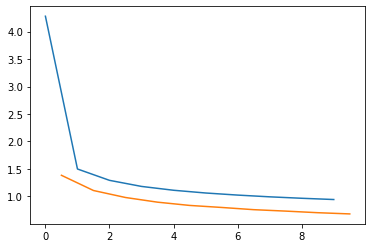

In [25]:
per_epoch_op = len(y_train)//batch_size
epoch_avg_train_loss = [np.mean(train_losses[i*per_epoch_op: (i+1)*per_epoch_op]) for i in range(epochs)]
plt.plot(np.arange(epochs), epoch_avg_train_loss)
plt.plot(np.arange(epochs)+0.5, test_losses)
plt.show()

[[9.9528849e-01 3.4600377e-04 5.9313948e-05 1.6356526e-03 1.7142971e-04
  7.8244178e-05 7.9324475e-10 2.4148885e-03 3.3654626e-08 5.8663154e-06]]


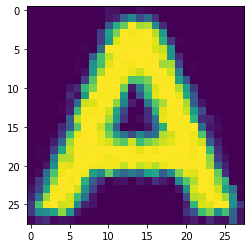

In [26]:
output = forward_pass(x_test[0].reshape(1, 28*28))
pred = tf.nn.softmax(output)
print(pred.numpy())
plt.imshow(x_test[0])

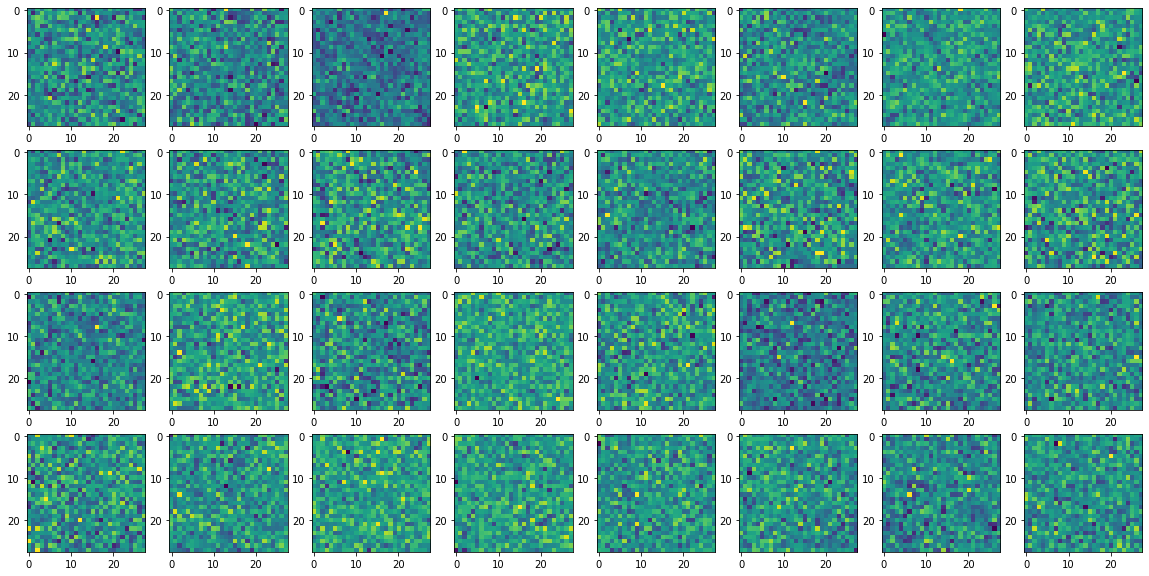

In [27]:
# Нека визуализираме какво е научил всеки неврон от скрития слой
fig, axss = plt.subplots(4, 8, figsize=(20, 10))
for i in range(32):
    axss[i//8][i%8].imshow(w[0].numpy()[:, i].reshape(28, 28))
plt.show()

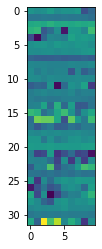

In [28]:
# И последния слой
plt.imshow(w[1].numpy())

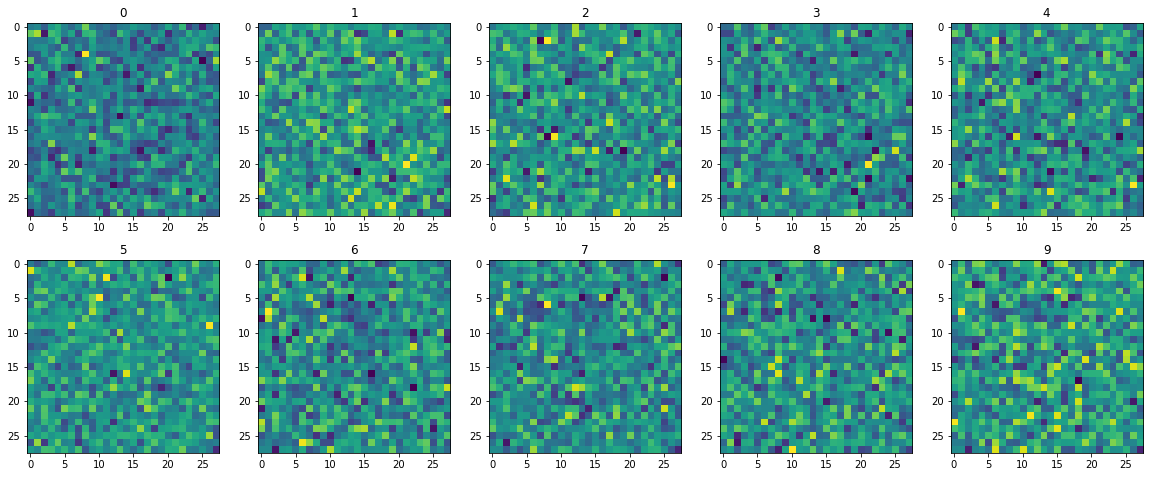

In [29]:
link = np.matmul(w[0].numpy(), w[1].numpy())
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
    axs[i//5][i%5].imshow(link[:, i].reshape(28, 28))
    axs[i//5][i%5].set_title(i)
plt.show()

In [30]:
# И така виждаме, една от големите разлики между невронните мрежи и методите за обучение до сега...
# Не ни дават обяснение на това какво правят... изглежда произволно и някак работи...

[0.72848177]
[0.04069847]
[0.02975424]
[0.02391353]
[0.02017279]
[0.01753483]
[0.01555841]
[0.01401417]
[0.01276995]
[0.01174299]
[0.01087913]
[0.01014163]
[0.0095036]
[0.00894563]
[0.00845318]
[0.00801502]
[0.00762209]
[0.00726806]
[0.00694717]
[0.00665472]
[0.00638682]
[0.00614113]
[0.00591433]
[0.00570431]
[0.00550931]
[0.00532803]
[0.00515869]
[0.00500023]
[0.00485147]
[0.00471183]
[0.00458013]
[0.00445611]
[0.00433885]
[0.00422775]
[0.00412245]
[0.00402248]
[0.00392726]
[0.00383701]
[0.00375079]
[0.00366849]
[0.00358985]
[0.00351443]
[0.00344255]
[0.00337329]
[0.00330711]
[0.00324366]
[0.00318247]
[0.00312376]
[0.00306731]
[0.00301276]
[0.00295999]
[0.0029096]
[0.00286086]
[0.00281355]
[0.0027679]
[0.00272368]
[0.00268111]
[0.00263974]
[0.00259955]
[0.00256079]
[0.00252322]
[0.00248671]
[0.00245139]
[0.00241691]
[0.00238337]
[0.0023509]
[0.0023195]
[0.0022887]
[0.00225873]
[0.00222959]
[0.0022014]
[0.00217368]
[0.00214668]
[0.00212051]
[0.00209493]
[0.00207007]
[0.00204568]
[0.002

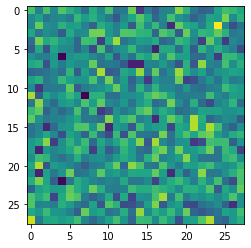

In [31]:
def find_typical(y, lr=1e0, it=100, verbose=False):
    typ_inp = tf.Variable(tf.random.normal((1, 28*28), 0.5, 0.25))
    
    for i in range(it):
        with tf.GradientTape() as tape:
            output = forward_pass(typ_inp)
            loss = tf.nn.softmax_cross_entropy_with_logits(labels=np.eye(10)[y].reshape(1, 10), logits=output)
        if it%10 == 0: print(loss.numpy())
        typ_inp.assign_sub(lr*tape.gradient(loss, typ_inp))
        typ_inp.assign(typ_inp - tf.reduce_min(typ_inp))
        typ_inp.assign(typ_inp / tf.reduce_max(typ_inp))
    
    return typ_inp.numpy()

plt.imshow(find_typical(0, 1e0, 100, True).reshape(28, 28))

In [32]:
# Изглежда по този начин не намерихме хубава картинка поради големите различия в различните видове a-та
# В следващи лекции ще видим че подобна стратегия е полезна при анализиране на по-дълбоки модели

In [33]:
# Сега нека демонстрираме правене на същото но на по-високо ниво, използвайки keras model и keras layers
# Най-простия вариант но с най-малко възможност за модификации:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28*28), np.eye(10)[y_train], batch_size=256, epochs=10, validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]))

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.7950 - accuracy: 0.7895 - val_loss: 0.4348 - val_accuracy: 0.8895
Epoch 2/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.6404 - accuracy: 0.8281 - val_loss: 0.3943 - val_accuracy: 0.8978
Epoch 3/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.6053 - accuracy: 0.8341 - val_loss: 0.3719 - val_accuracy: 0.9023
Epoch 4/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5823 - accuracy: 0.8386 - val_loss: 0.3549 - val_accuracy: 0.9046
Epoch 5/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.5658 - accuracy: 0.8420 - val_loss: 0.3437 - val_accuracy: 0.9067
Epoch 6/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.5530 - accuracy: 0.8447 - val_loss: 0.3354 - val_accuracy: 0.9077
Epoch 7/10
529114/529114 [=================

In [34]:
# Доста по лесно за писане, сега нека видим любимия ми начин - чрез така нареченото functional API
def model_forward(x):
    x = tf.keras.layers.Dense(32, input_dim=28*28, activation='relu')(x)
    x = tf.keras.layers.Dense(10, input_dim=32, activation='softmax')(x)
    return x

inp = tf.keras.Input(shape=(28*28,))
out = model_forward(inp)
model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28*28), np.eye(10)[y_train], batch_size=256, epochs=10, validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]))

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.7890 - accuracy: 0.7895 - val_loss: 0.4247 - val_accuracy: 0.8888
Epoch 2/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6250 - accuracy: 0.8283 - val_loss: 0.3868 - val_accuracy: 0.8983
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5938 - accuracy: 0.8347 - val_loss: 0.3667 - val_accuracy: 0.9024
Epoch 4/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5738 - accuracy: 0.8388 - val_loss: 0.3524 - val_accuracy: 0.9042
Epoch 5/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5586 - accuracy: 0.8420 - val_loss: 0.3419 - val_accuracy: 0.9066
Epoch 6/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5461 - accuracy: 0.8448 - val_loss: 0.3318 - val_accuracy: 0.9079
Epoch 7/10
529114/529114 [=================

In [35]:
# Използвайки това functional API, можем да реализираме мрежа с над 1 вход, над 1 изход и т.н.
# На практика имаме пълна свобода със структурата на мрежата, неиния loss и т.н.

# Друг вариант е да наследим класа Model, тогава ще имаме и свобода да променяме и методите compile и fit
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(32, input_dim=28*28, activation="relu")
        self.d2 = tf.keras.layers.Dense(10, input_dim=32, activation="softmax")
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return x
    
model = MyModel()

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28*28), np.eye(10)[y_train], batch_size=256, epochs=10, validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]))

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.7941 - accuracy: 0.7877 - val_loss: 0.4277 - val_accuracy: 0.8886
Epoch 2/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6288 - accuracy: 0.8277 - val_loss: 0.3892 - val_accuracy: 0.8974
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5952 - accuracy: 0.8347 - val_loss: 0.3662 - val_accuracy: 0.9021
Epoch 4/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5723 - accuracy: 0.8393 - val_loss: 0.3494 - val_accuracy: 0.9047
Epoch 5/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.5550 - accuracy: 0.8430 - val_loss: 0.3366 - val_accuracy: 0.9079
Epoch 6/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5415 - accuracy: 0.8459 - val_loss: 0.3269 - val_accuracy: 0.9105
Epoch 7/10
529114/529114 [=================

In [36]:
# Сега да разгледаме няколко примера в които графиката на промяната на loss ще ни бъде полезна

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train.reshape(-1, 28*28), np.eye(10)[y_train], batch_size=256, epochs=10, validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]))

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 0.8165 - accuracy: 0.7787 - val_loss: 0.4252 - val_accuracy: 0.8908
Epoch 2/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6237 - accuracy: 0.8297 - val_loss: 0.3830 - val_accuracy: 0.8981
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5902 - accuracy: 0.8361 - val_loss: 0.3616 - val_accuracy: 0.9026
Epoch 4/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5696 - accuracy: 0.8400 - val_loss: 0.3470 - val_accuracy: 0.9046
Epoch 5/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5541 - accuracy: 0.8432 - val_loss: 0.3359 - val_accuracy: 0.9068
Epoch 6/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5415 - accuracy: 0.8459 - val_loss: 0.3257 - val_accuracy: 0.9082
Epoch 7/10
529114/529114 [=================

In [37]:
history

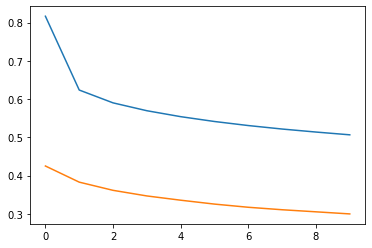

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [39]:
# Но зависимост от размера на данните информация за само epoch-ите не е достатъчна

class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
batch_history = LossHistory()
history = model.fit(x_train.reshape(-1, 28*28), 
          np.eye(10)[y_train], 
          batch_size=256, epochs=10, 
          validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]),
          callbacks=[batch_history]
         )

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.8061 - accuracy: 0.7855 - val_loss: 0.4303 - val_accuracy: 0.8911
Epoch 2/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.6305 - accuracy: 0.8291 - val_loss: 0.3894 - val_accuracy: 0.8994
Epoch 3/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5961 - accuracy: 0.8356 - val_loss: 0.3667 - val_accuracy: 0.9036
Epoch 4/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5745 - accuracy: 0.8394 - val_loss: 0.3506 - val_accuracy: 0.9062
Epoch 5/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.5594 - accuracy: 0.8426 - val_loss: 0.3396 - val_accuracy: 0.9090
Epoch 6/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5475 - accuracy: 0.8451 - val_loss: 0.3315 - val_accuracy: 0.9107
Epoch 7/10
529114/529114 [=================

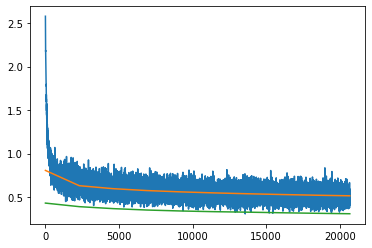

In [40]:
plt.plot(batch_history.losses)
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["loss"])
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["val_loss"])
plt.show()

In [41]:
# голям lr

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(tf.optimizers.SGD(1e0), loss="categorical_crossentropy", metrics=["accuracy"])
batch_history = LossHistory()
history = model.fit(x_train.reshape(-1, 28*28), 
          np.eye(10)[y_train], 
          batch_size=256, epochs=10, 
          validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]),
          callbacks=[batch_history]
         )

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 2.1753 - accuracy: 0.1591 - val_loss: 2.0176 - val_accuracy: 0.2133
Epoch 2/10
529114/529114 [==============================] - 7s 12us/sample - loss: 2.1233 - accuracy: 0.1781 - val_loss: 2.0681 - val_accuracy: 0.1916
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 2.0632 - accuracy: 0.2026 - val_loss: 2.1004 - val_accuracy: 0.2787
Epoch 4/10
529114/529114 [==============================] - 7s 12us/sample - loss: 2.0148 - accuracy: 0.2222 - val_loss: 1.7421 - val_accuracy: 0.3360
Epoch 5/10
529114/529114 [==============================] - 7s 12us/sample - loss: 1.9266 - accuracy: 0.2571 - val_loss: 1.7556 - val_accuracy: 0.3040
Epoch 6/10
529114/529114 [==============================] - 6s 12us/sample - loss: 1.9540 - accuracy: 0.2473 - val_loss: 1.7721 - val_accuracy: 0.2916
Epoch 7/10
529114/529114 [=================

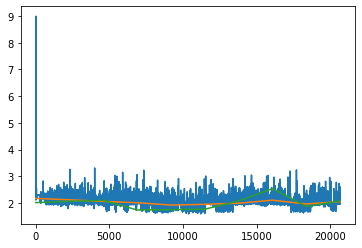

In [42]:
plt.plot(batch_history.losses)
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["loss"])
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["val_loss"])
plt.show()

In [43]:
# Тези скоци нагоре значат че много прескачаме минимума
# Нисък lr

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(tf.optimizers.SGD(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
batch_history = LossHistory()
history = model.fit(x_train.reshape(-1, 28*28), 
          np.eye(10)[y_train], 
          batch_size=256, epochs=10, 
          validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]),
          callbacks=[batch_history]
         )

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 14us/sample - loss: 2.4480 - accuracy: 0.1024 - val_loss: 2.4116 - val_accuracy: 0.1068
Epoch 2/10
529114/529114 [==============================] - 7s 13us/sample - loss: 2.3844 - accuracy: 0.1098 - val_loss: 2.3526 - val_accuracy: 0.1157
Epoch 3/10
529114/529114 [==============================] - 7s 13us/sample - loss: 2.3372 - accuracy: 0.1195 - val_loss: 2.3072 - val_accuracy: 0.1291
Epoch 4/10
529114/529114 [==============================] - 7s 12us/sample - loss: 2.3000 - accuracy: 0.1330 - val_loss: 2.2705 - val_accuracy: 0.1478
Epoch 5/10
529114/529114 [==============================] - 6s 12us/sample - loss: 2.2692 - accuracy: 0.1496 - val_loss: 2.2390 - val_accuracy: 0.1672
Epoch 6/10
529114/529114 [==============================] - 6s 12us/sample - loss: 2.2423 - accuracy: 0.1661 - val_loss: 2.2109 - val_accuracy: 0.1853
Epoch 7/10
529114/529114 [=================

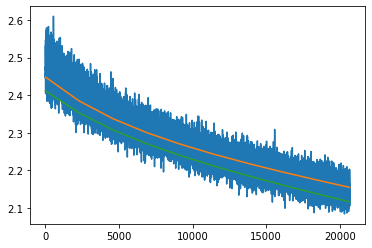

In [44]:
plt.plot(batch_history.losses)
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["loss"])
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["val_loss"])
plt.show()

In [45]:
# Твърде близки до 0 начални стойности (подобно на твърде близки до 0 тренировъчни данни)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu", kernel_initializer=tf.keras.initializers.RandomNormal(0, 1e-5)))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=tf.keras.initializers.RandomNormal(0, 1e-5)))

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
batch_history = LossHistory()
history = model.fit(x_train.reshape(-1, 28*28), 
          np.eye(10)[y_train], 
          batch_size=256, epochs=10, 
          validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]),
          callbacks=[batch_history]
         )

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 1.9735 - accuracy: 0.2955 - val_loss: 0.8736 - val_accuracy: 0.7860
Epoch 2/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.8429 - accuracy: 0.7863 - val_loss: 0.5036 - val_accuracy: 0.8756
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6933 - accuracy: 0.8166 - val_loss: 0.4309 - val_accuracy: 0.8894
Epoch 4/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6385 - accuracy: 0.8273 - val_loss: 0.3967 - val_accuracy: 0.8967
Epoch 5/10
529114/529114 [==============================] - 6s 12us/sample - loss: 0.6069 - accuracy: 0.8324 - val_loss: 0.3757 - val_accuracy: 0.8998
Epoch 6/10
529114/529114 [==============================] - 7s 12us/sample - loss: 0.5856 - accuracy: 0.8356 - val_loss: 0.3612 - val_accuracy: 0.9030
Epoch 7/10
529114/529114 [=================

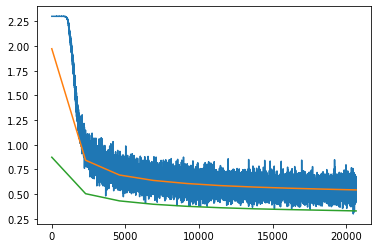

In [46]:
plt.plot(batch_history.losses)
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["loss"])
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["val_loss"])
plt.show()

In [47]:
# Твърде големи начални стойности (подобно на ненормирани тренировъчни данни)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28*28, activation="relu", kernel_initializer=tf.keras.initializers.RandomNormal(0, 1e3)))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_initializer=tf.keras.initializers.RandomNormal(0, 1e3)))

model.compile(tf.optimizers.SGD(1e-2), loss="categorical_crossentropy", metrics=["accuracy"])
batch_history = LossHistory()
history = model.fit(x_train.reshape(-1, 28*28), 
          np.eye(10)[y_train], 
          batch_size=256, epochs=10, 
          validation_data=(x_test.reshape(-1, 28*28), np.eye(10)[y_test]),
          callbacks=[batch_history]
         )

Train on 529114 samples, validate on 18724 samples
Epoch 1/10
529114/529114 [==============================] - 7s 13us/sample - loss: 4114376.9673 - accuracy: 0.3943 - val_loss: 487867.5181 - val_accuracy: 0.3478
Epoch 2/10
529114/529114 [==============================] - 7s 13us/sample - loss: 367465.8415 - accuracy: 0.2908 - val_loss: 160483.4176 - val_accuracy: 0.2859
Epoch 3/10
529114/529114 [==============================] - 6s 12us/sample - loss: 167237.3440 - accuracy: 0.2637 - val_loss: 94871.7627 - val_accuracy: 0.3118
Epoch 4/10
529114/529114 [==============================] - 6s 12us/sample - loss: 104060.6784 - accuracy: 0.2464 - val_loss: 67915.8073 - val_accuracy: 0.2239
Epoch 5/10
529114/529114 [==============================] - 7s 12us/sample - loss: 75156.9643 - accuracy: 0.2349 - val_loss: 51416.6854 - val_accuracy: 0.2287
Epoch 6/10
529114/529114 [==============================] - 7s 12us/sample - loss: 58481.1638 - accuracy: 0.2288 - val_loss: 39610.5888 - val_accur

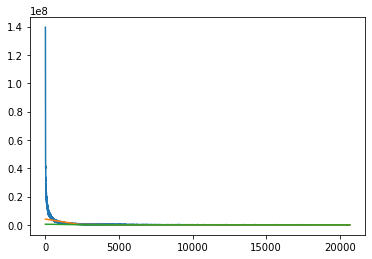

In [48]:
plt.plot(batch_history.losses)
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["loss"])
plt.plot(np.arange(10)*(len(batch_history.losses)/9), history.history["val_loss"])
plt.show()